In [1]:
import sys
sys.path.append('../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
# fs=20
# import ClassMSSFR
# from matplotlib.ticker import (FormatStrFormatter,
#                                AutoMinorLocator)

In [2]:
\

In [3]:
print(list(range(14)))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [16]:
fs = 28 


NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf

NSNSrate1 = [250,2810] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
BHBHrate1 = [9.7,101] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
BHNSrate1 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 


BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf

ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]


def plotDCOrates(DCOtype='BHNS'):
    ncols=1
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,10))
    

    
    ############## 2nd panel on the right ##########################
    ################################################################
    
#     nComparisons = 14
#     xx = np.asarray(range(nComparisons)) -1 
#     xmin, xmax = np.min(xx), np.max(xx) 
    
    
    # Number of studies we have available to compare with; 
    Ncompare = 12

     
    df_name = '/Users/floorbroekgaarden/Downloads/'+DCOtype+'_intrinsic.csv'
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
    for ind_n, name in enumerate(df.columns):
        rate = df[name]
        mask_notna = (df[name].notna())
        rate = rate[mask_notna]
        colors = sns.color_palette("husl", len(rate))
        axe.scatter(rate,  ind_n*np.ones_like(rate), s=105, c='gray', zorder=10)
        

        
        plt.errorbar(x=[np.min(rate),np.max(rate)], y=2*[ind_n], yerr=2*[0.5], color='k', zorder=5)

        
        
        
        
    # axes layout and mark up 
    axe.set_xscale('log')
    xlabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'$- $', fontsize=fs, setMinor=False)
    bps_names = []
    for ind_m, bps_model in enumerate(df.columns):
        bps_names.append(r'\textbf{%s}'%(bps_model) )
    axe.set_yticks(range(len(df.columns)))
    axe.set_yticklabels(bps_names, rotation=0, fontsize=18)

    axe.set_xlim(1E-3, 1E4)
    
    
    

#     else:
#         axe[ind_t,1].set_xticks([])
#         axe[ind_t,1].set_xticklabels( () )
                
    




            
    ######################
    # make up all the nice things in background and axes
    
#     for ind_t, DCOtype in enumerate(Types):
#         axe[ind_t,1].set_xlim(xmin, xmax)
#         axe[ind_t,1].set_yscale('log')    
#         axe[ind_t,1].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
    
    
    
#         if whichRate=='intrinsic':
#             # if plotting intrinsic rates, plot the areas from the LIGO/Virgo detected confidence interval for the rate 
    DCOtypeIndexDict = {'BHBH':0, 'BHNS':1, 'NSNS':2}
    ind_t=DCOtypeIndexDict[DCOtype]
    
    xx = np.linspace(-100, 100, 100)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
    if ind_t in [1,2]:
        axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=2)


    elif ind_t ==0:
        # for BHBH rates also plot intrinsic z=0 estimated rates based on a redshift model
        min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
        max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
        axe.fill_betweenx(y=xx, x1=min_obs_rate2, x2=max_obs_rate2,  alpha=0.2, color=DCOtypeColorsDict[DCOtype], zorder=0)
        axe.plot(min_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)
        axe.plot(max_obs_rate, xx,  c='k', linestyle=':', lw=1., alpha=0.5)

    # for BHNS plot that its a upper limit
    if ind_t==1:
        axe.scatter(max_obs_rate, xx, marker=8, color=DCOtypeColorsDict[DCOtype], zorder=0, s=120)    

    
    axe.set_ylim(-1,len(df.columns))
    
    
    
#         CHECK WHICH ONES HAVE CONSISTENT RATES FOR ALL 3 DCO TYPES: 
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
    df_name_BHBH = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
    df_name_BHNS = '/Users/floorbroekgaarden/Downloads/BHNS_intrinsic.csv'
    df_name_NSNS = '/Users/floorbroekgaarden/Downloads/NSNS_intrinsic.csv'
    
    df_BHBH = pd.read_csv(df_name_BHBH, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
    df = df_BHBH
    df_BHNS = pd.read_csv(df_name_BHNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
    df_NSNS = pd.read_csv(df_name_NSNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)        
    for ind_n, name in enumerate(df_NSNS.columns):
        rate_BHBH = df_BHBH[name][df_BHBH[name].notna()]#.astype(float)
        rate_BHNS = df_BHNS[name][df_BHNS[name].notna()]#.astype(float)
        rate_NSNS = df_NSNS[name][df_NSNS[name].notna()]#.astype(float)

        maskBHBH = (rate_BHBH>= BHBHratez0[0]) & (rate_BHBH <=BHBHratez0[1])
        maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
        maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])

        maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 

        if DCOtype=='BHBH':
            axe.scatter(rate_BHBH[maskGWTC2],  ind_n*np.ones_like(rate_BHBH)[maskGWTC2],  s=145, c='r', marker='x', zorder=100)
        elif DCOtype=='BHNS':
            axe.scatter(rate_BHNS[maskGWTC2],  ind_n*np.ones_like(rate_BHNS)[maskGWTC2],  s=145, c='r', marker='x', zorder=100)
        elif DCOtype=='NSNS':
            axe.scatter(rate_NSNS[maskGWTC2],  ind_n*np.ones_like(rate_NSNS)[maskGWTC2],  s=145, c='r', marker='x', zorder=100)


            
    
    
    axe.text(0.05, 0.88, s=r'\textbf{%s}'%DCOtype , rotation = 0, fontsize = fs+8, color =DCOtypeColorsDict[DCOtype], ha = 'left',transform=axe.transAxes, weight = 'bold')
    
    
    ################################################################
    ################################################################
    ################################################################
    
    
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




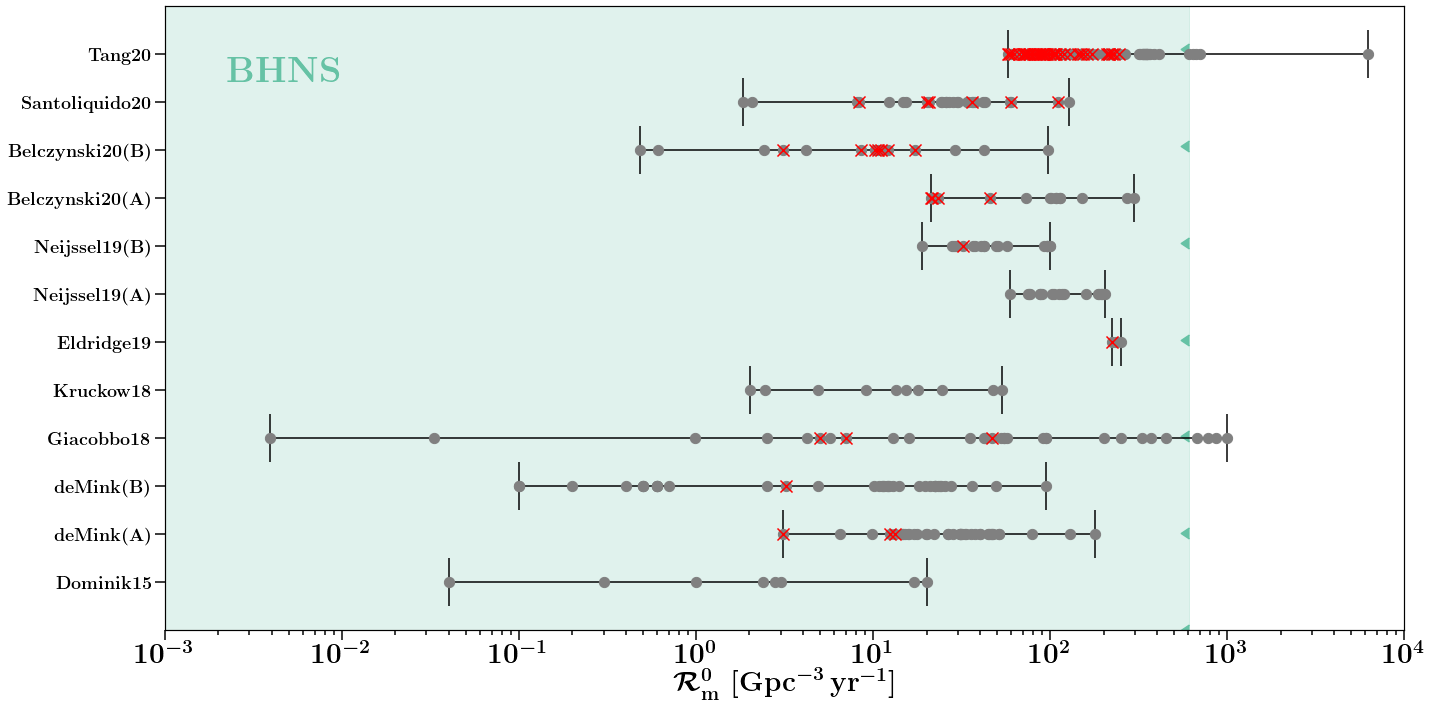

In [17]:


plotDCOrates(DCOtype='BHNS')

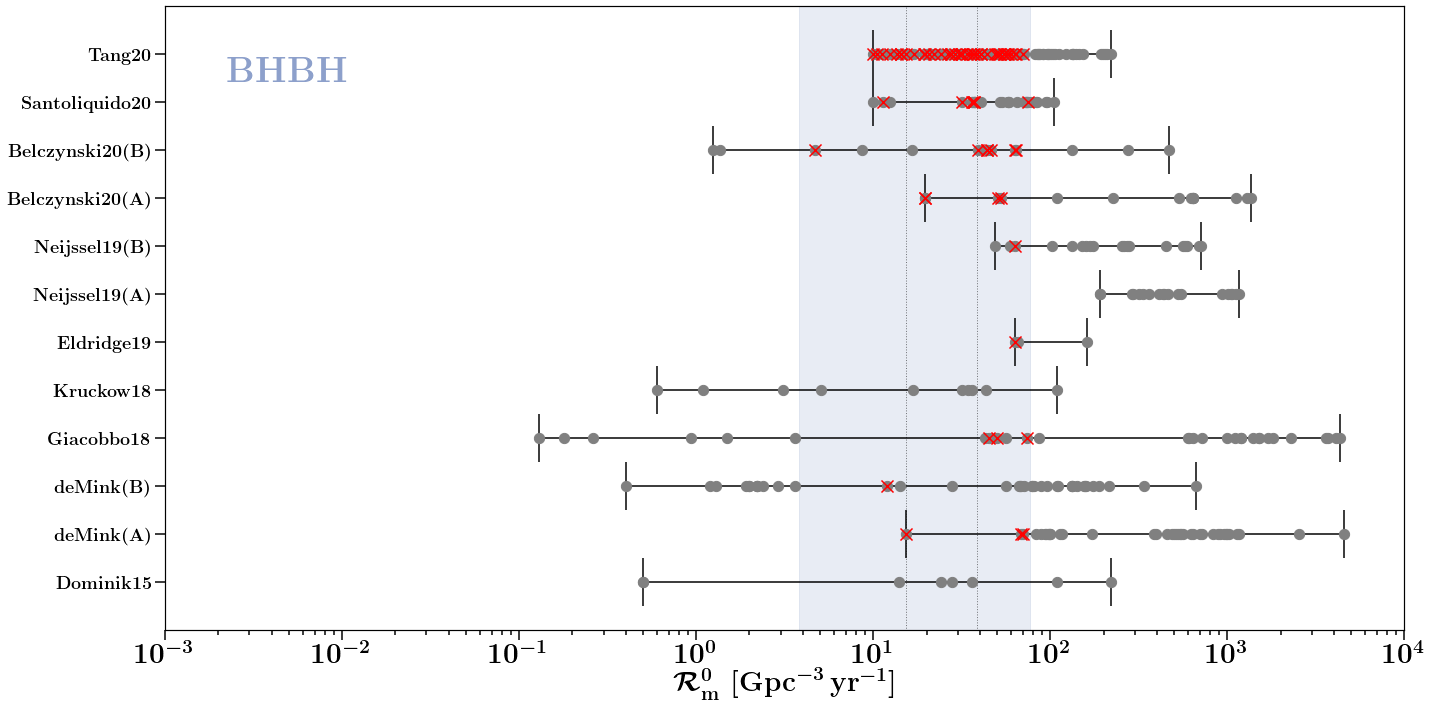

In [18]:


plotDCOrates(DCOtype='BHBH')

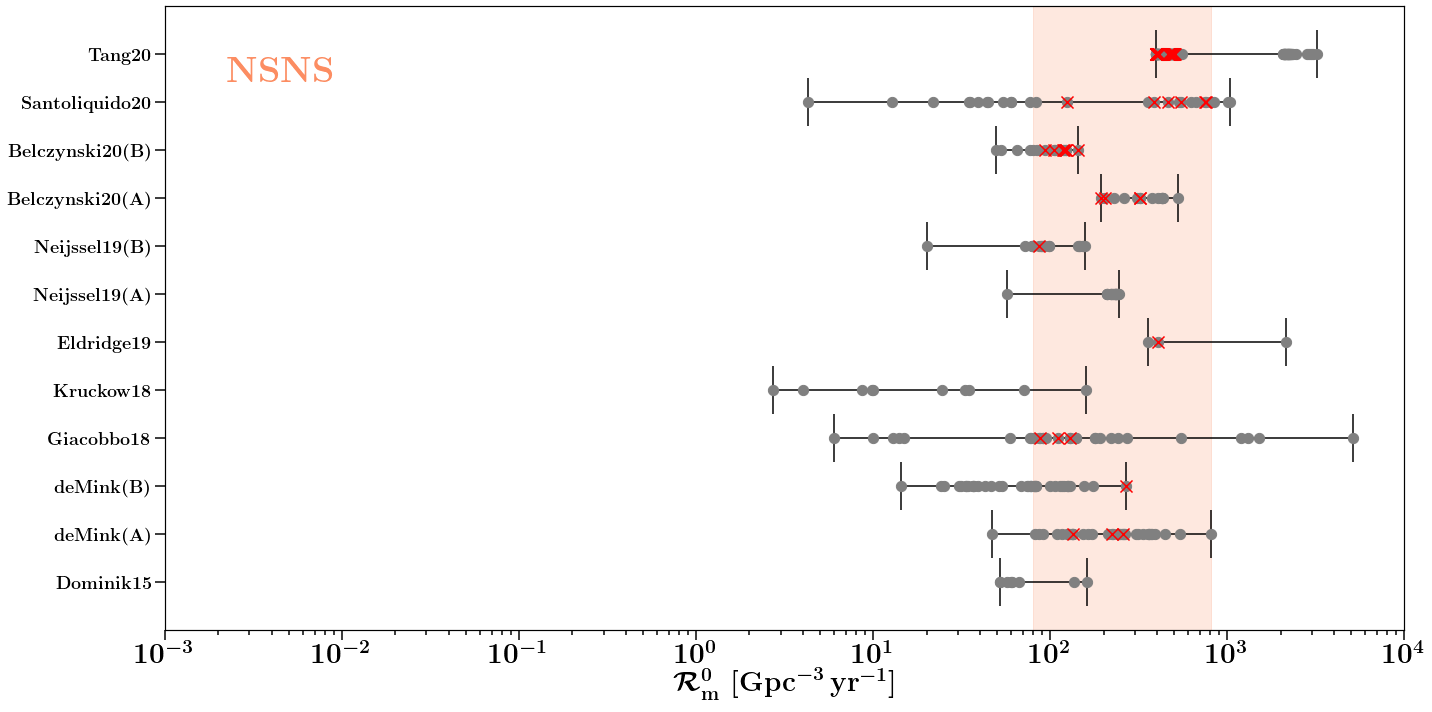

In [19]:


plotDCOrates(DCOtype='NSNS')